In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

## Flight Price ##

Q1

In [3]:
#Loading dataset
data=pd.read_excel('flight_price.xlsx')
df=data.copy()
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
print('The number of rows in this dataset is  {}'.format(len(df)))
print('The number of columns in this dataset is  {}'.format(len(df.columns)))


The number of rows in this dataset is  10683
The number of columns in this dataset is  11


Q2

<AxesSubplot:xlabel='Price', ylabel='Count'>

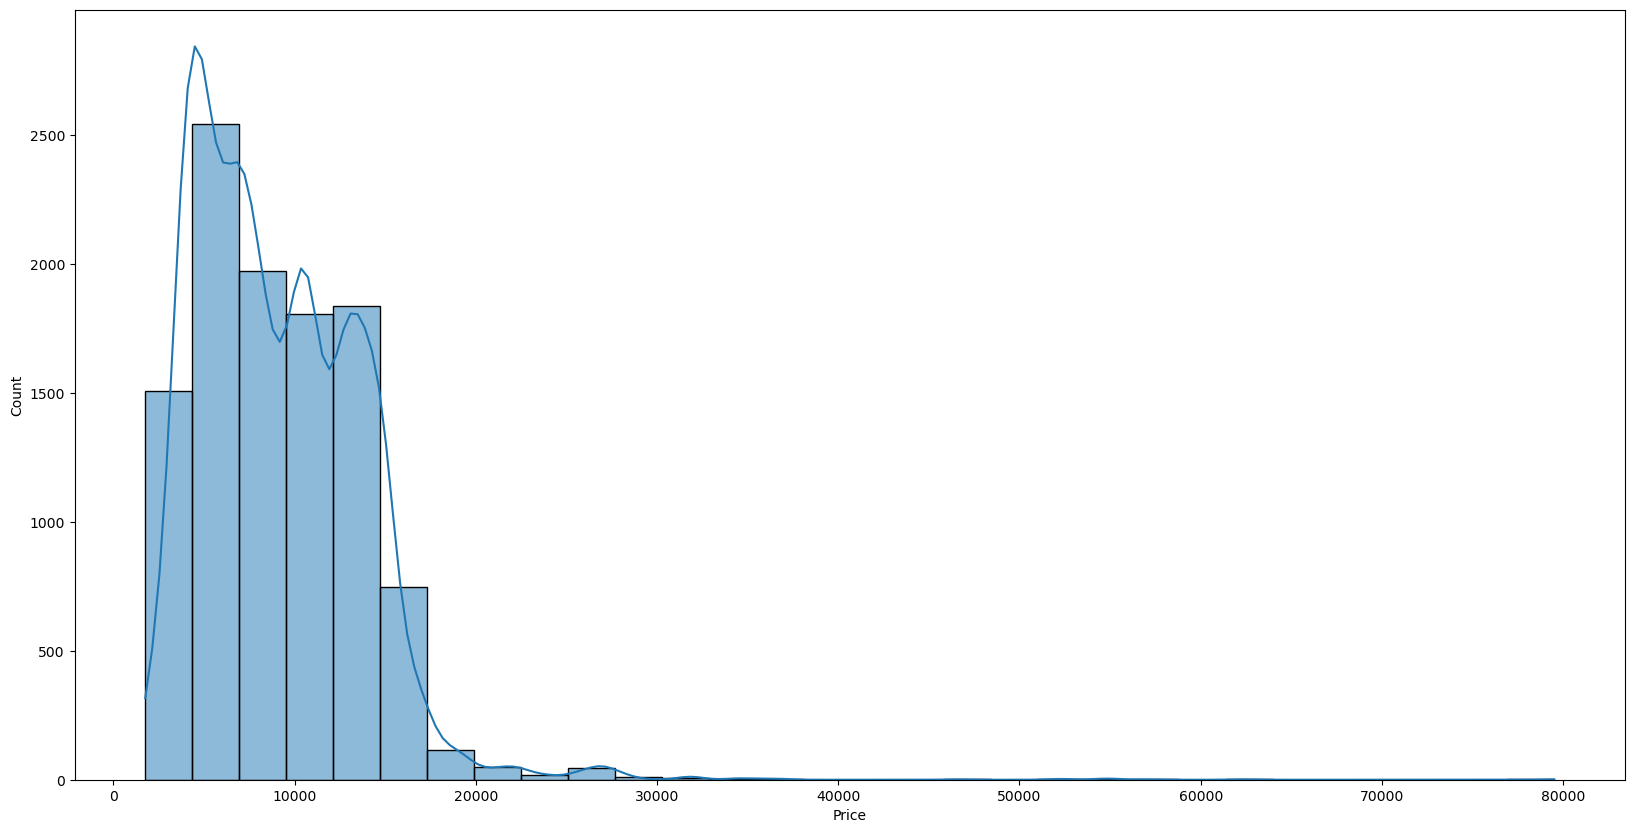

In [11]:
#Flight price distribution
plt.figure(figsize=(20,10))
sns.histplot(data=df,x=df['Price'],kde=True,bins=30,palette='pastel')

The flight price distribution is right skewed. Log transformation will make it normal

Q3

In [14]:
print('The minimum is: ',df['Price'].min())
print('The maximum is: ',df['Price'].max())

The minimum is:  1759
The maximum is:  79512


Q4


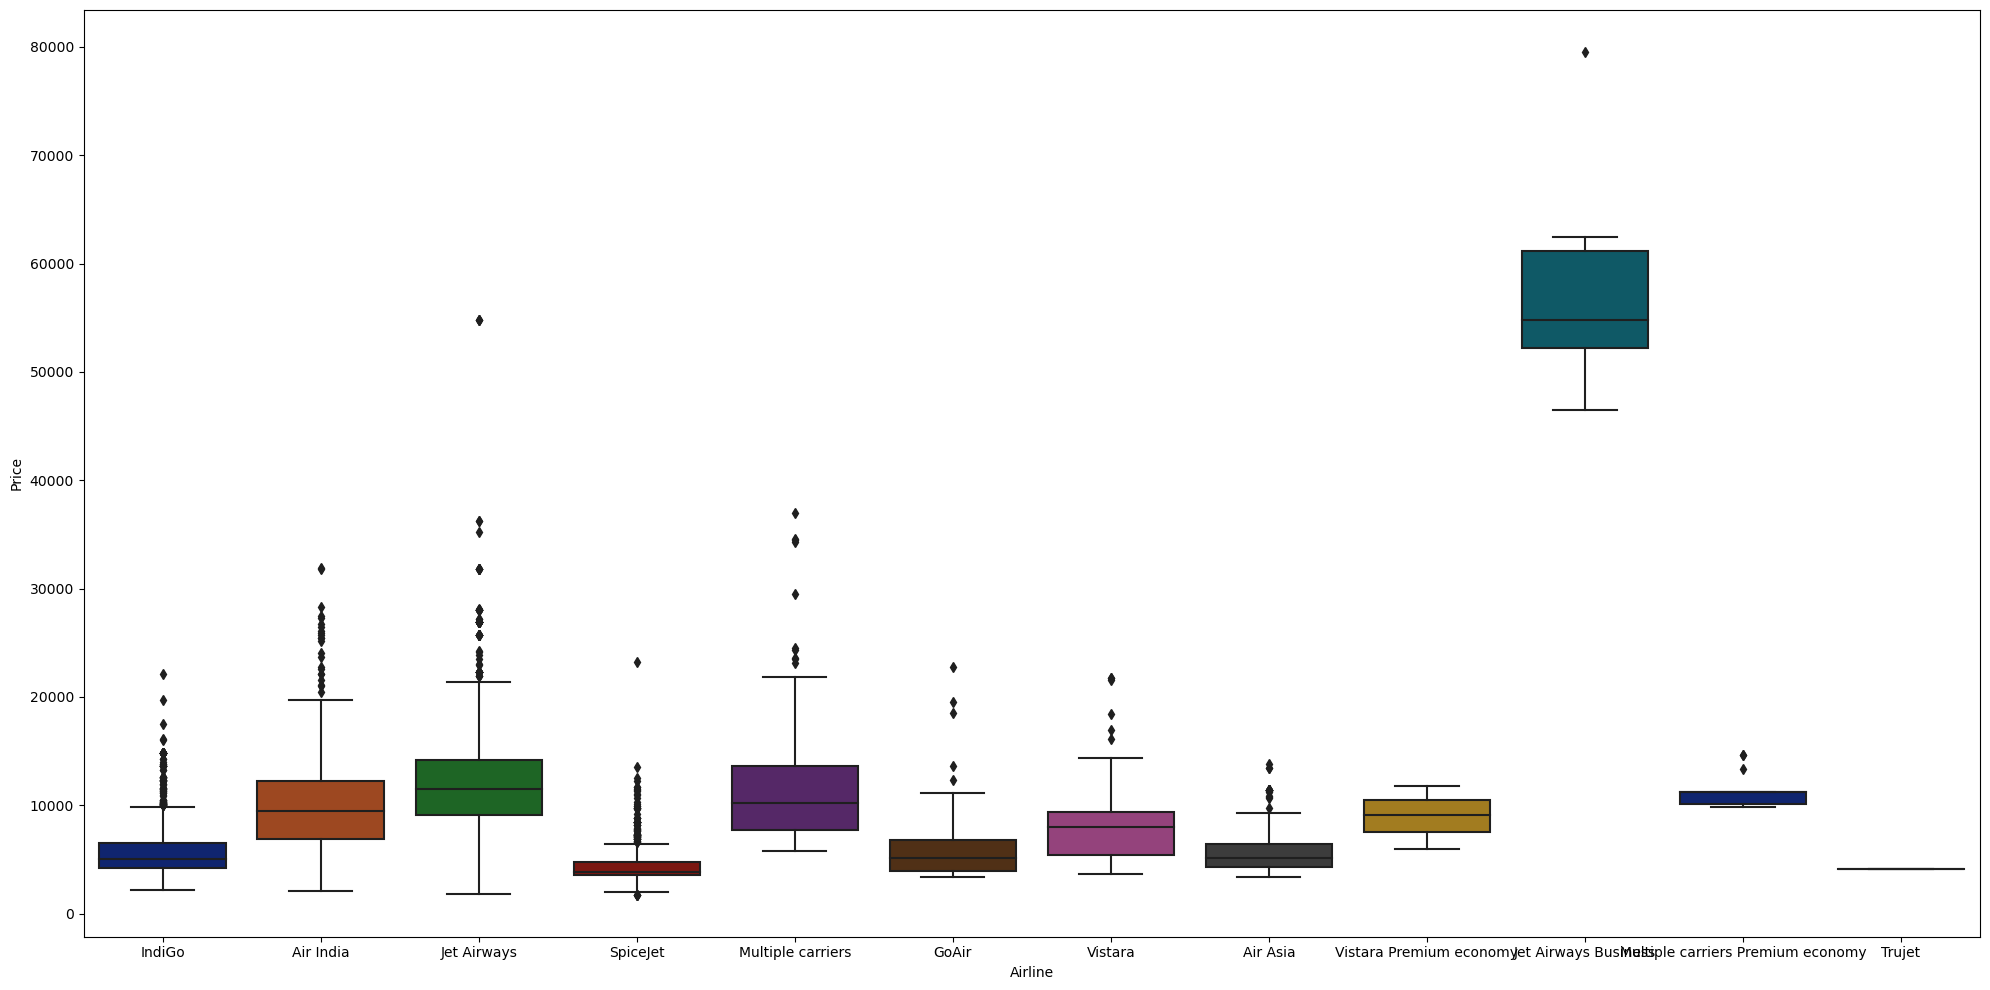

In [28]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='Airline',y='Price',palette='dark')
plt.tight_layout()

- Jet Airways prices are really high compared to others becoz they used to cater only international routes.

Q5

In [60]:
#Identifying outliers
# To identify outliers we need to trnasform the dataset by converting most of the categorical to numerical features
data=pd.read_csv('Transformed_Flight_Data.csv')
df=data.copy()
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute,Encoded_Add_Info,Encoded_Arline,Encoded_Source,Encoded_Destination
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24.0,3.0,2019.0,22.0,20.0,1.0,10.0,2.0,50.0,8.0,3.0,0.0,5.0
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1.0,5.0,2019.0,5.0,50.0,13.0,15.0,7.0,25.0,8.0,1.0,3.0,0.0


<AxesSubplot:>

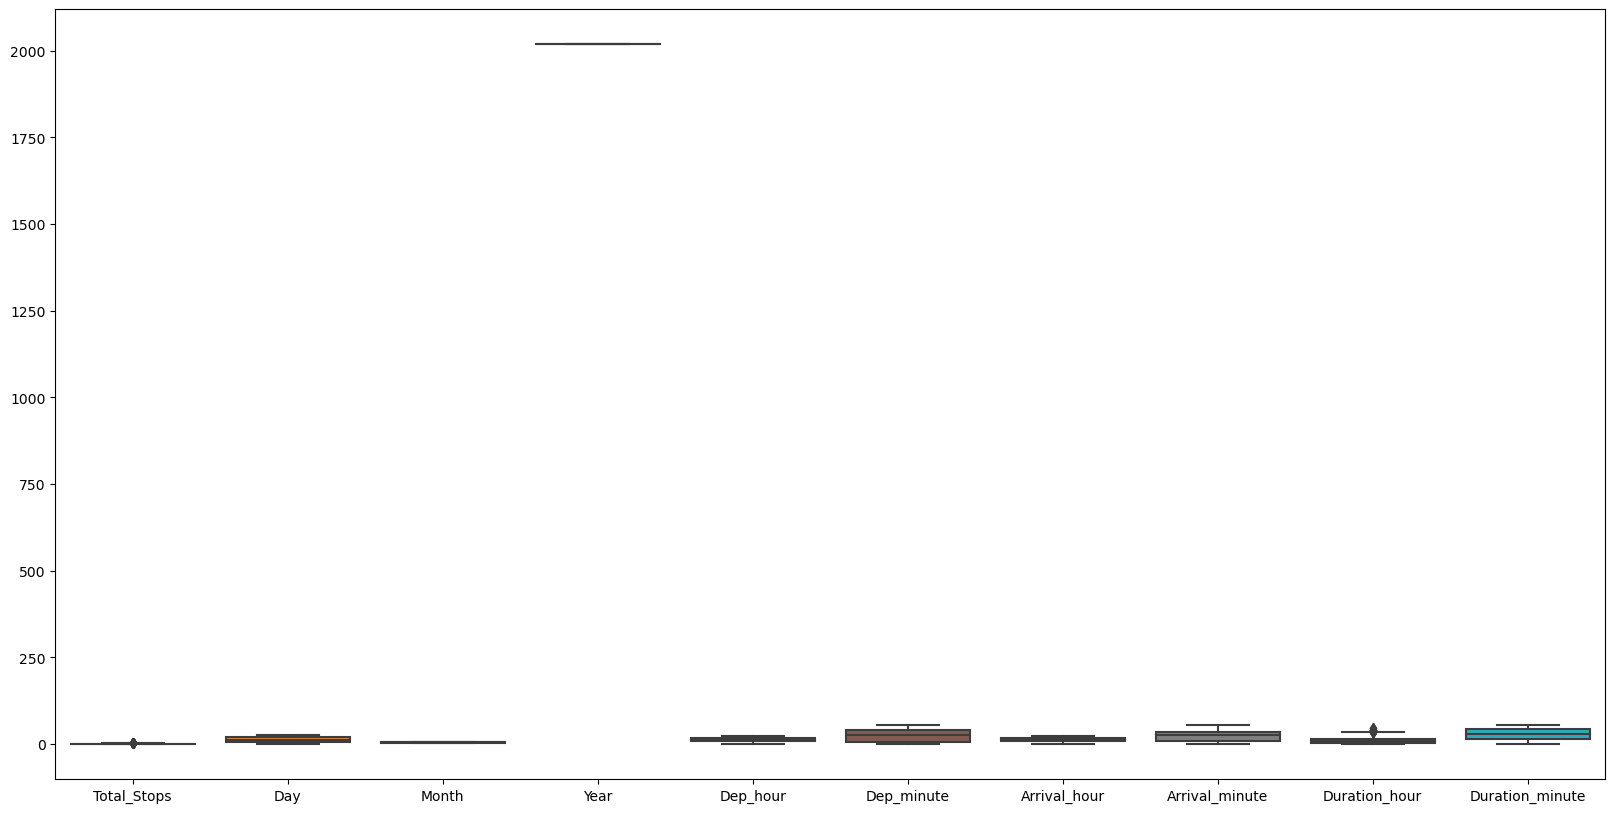

In [32]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df[['Total_Stops','Day','Month','Year','Dep_hour','Dep_minute','Arrival_hour','Arrival_minute','Duration_hour','Duration_minute']])

<AxesSubplot:>

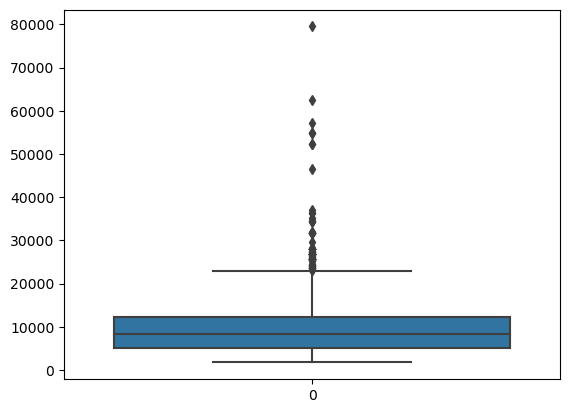

In [33]:
sns.boxplot(data=df['Price'])

Price has more outliers

Outliers are special cases which are far from the average records. It can make model biased and our results less accurate.

Q6

I would check how many flights are present for each month to identify peak traveeling seasons. I would use simple bar plot

<AxesSubplot:xlabel='Month'>

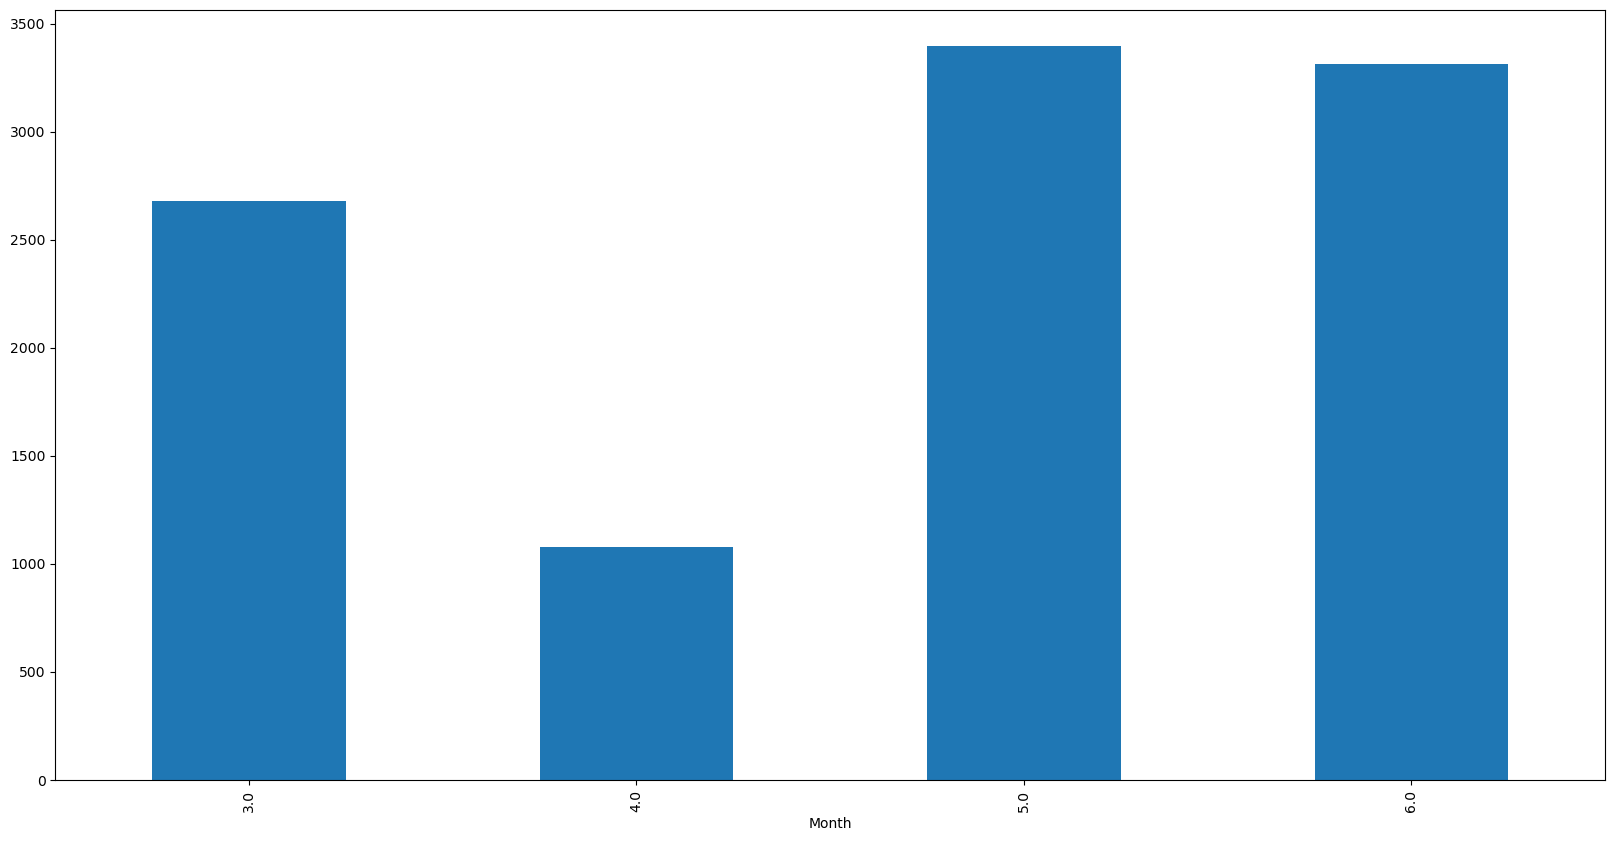

In [38]:
df.groupby(by='Month')['Airline'].count().plot(kind='bar',figsize=(20,10))

May and June are peak travelling seasons


Q7

In [39]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day', 'Month', 'Year', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hour',
       'Duration_minute', 'Encoded_Add_Info', 'Encoded_Arline',
       'Encoded_Source', 'Encoded_Destination'],
      dtype='object')

<AxesSubplot:xlabel='Price', ylabel='Count'>

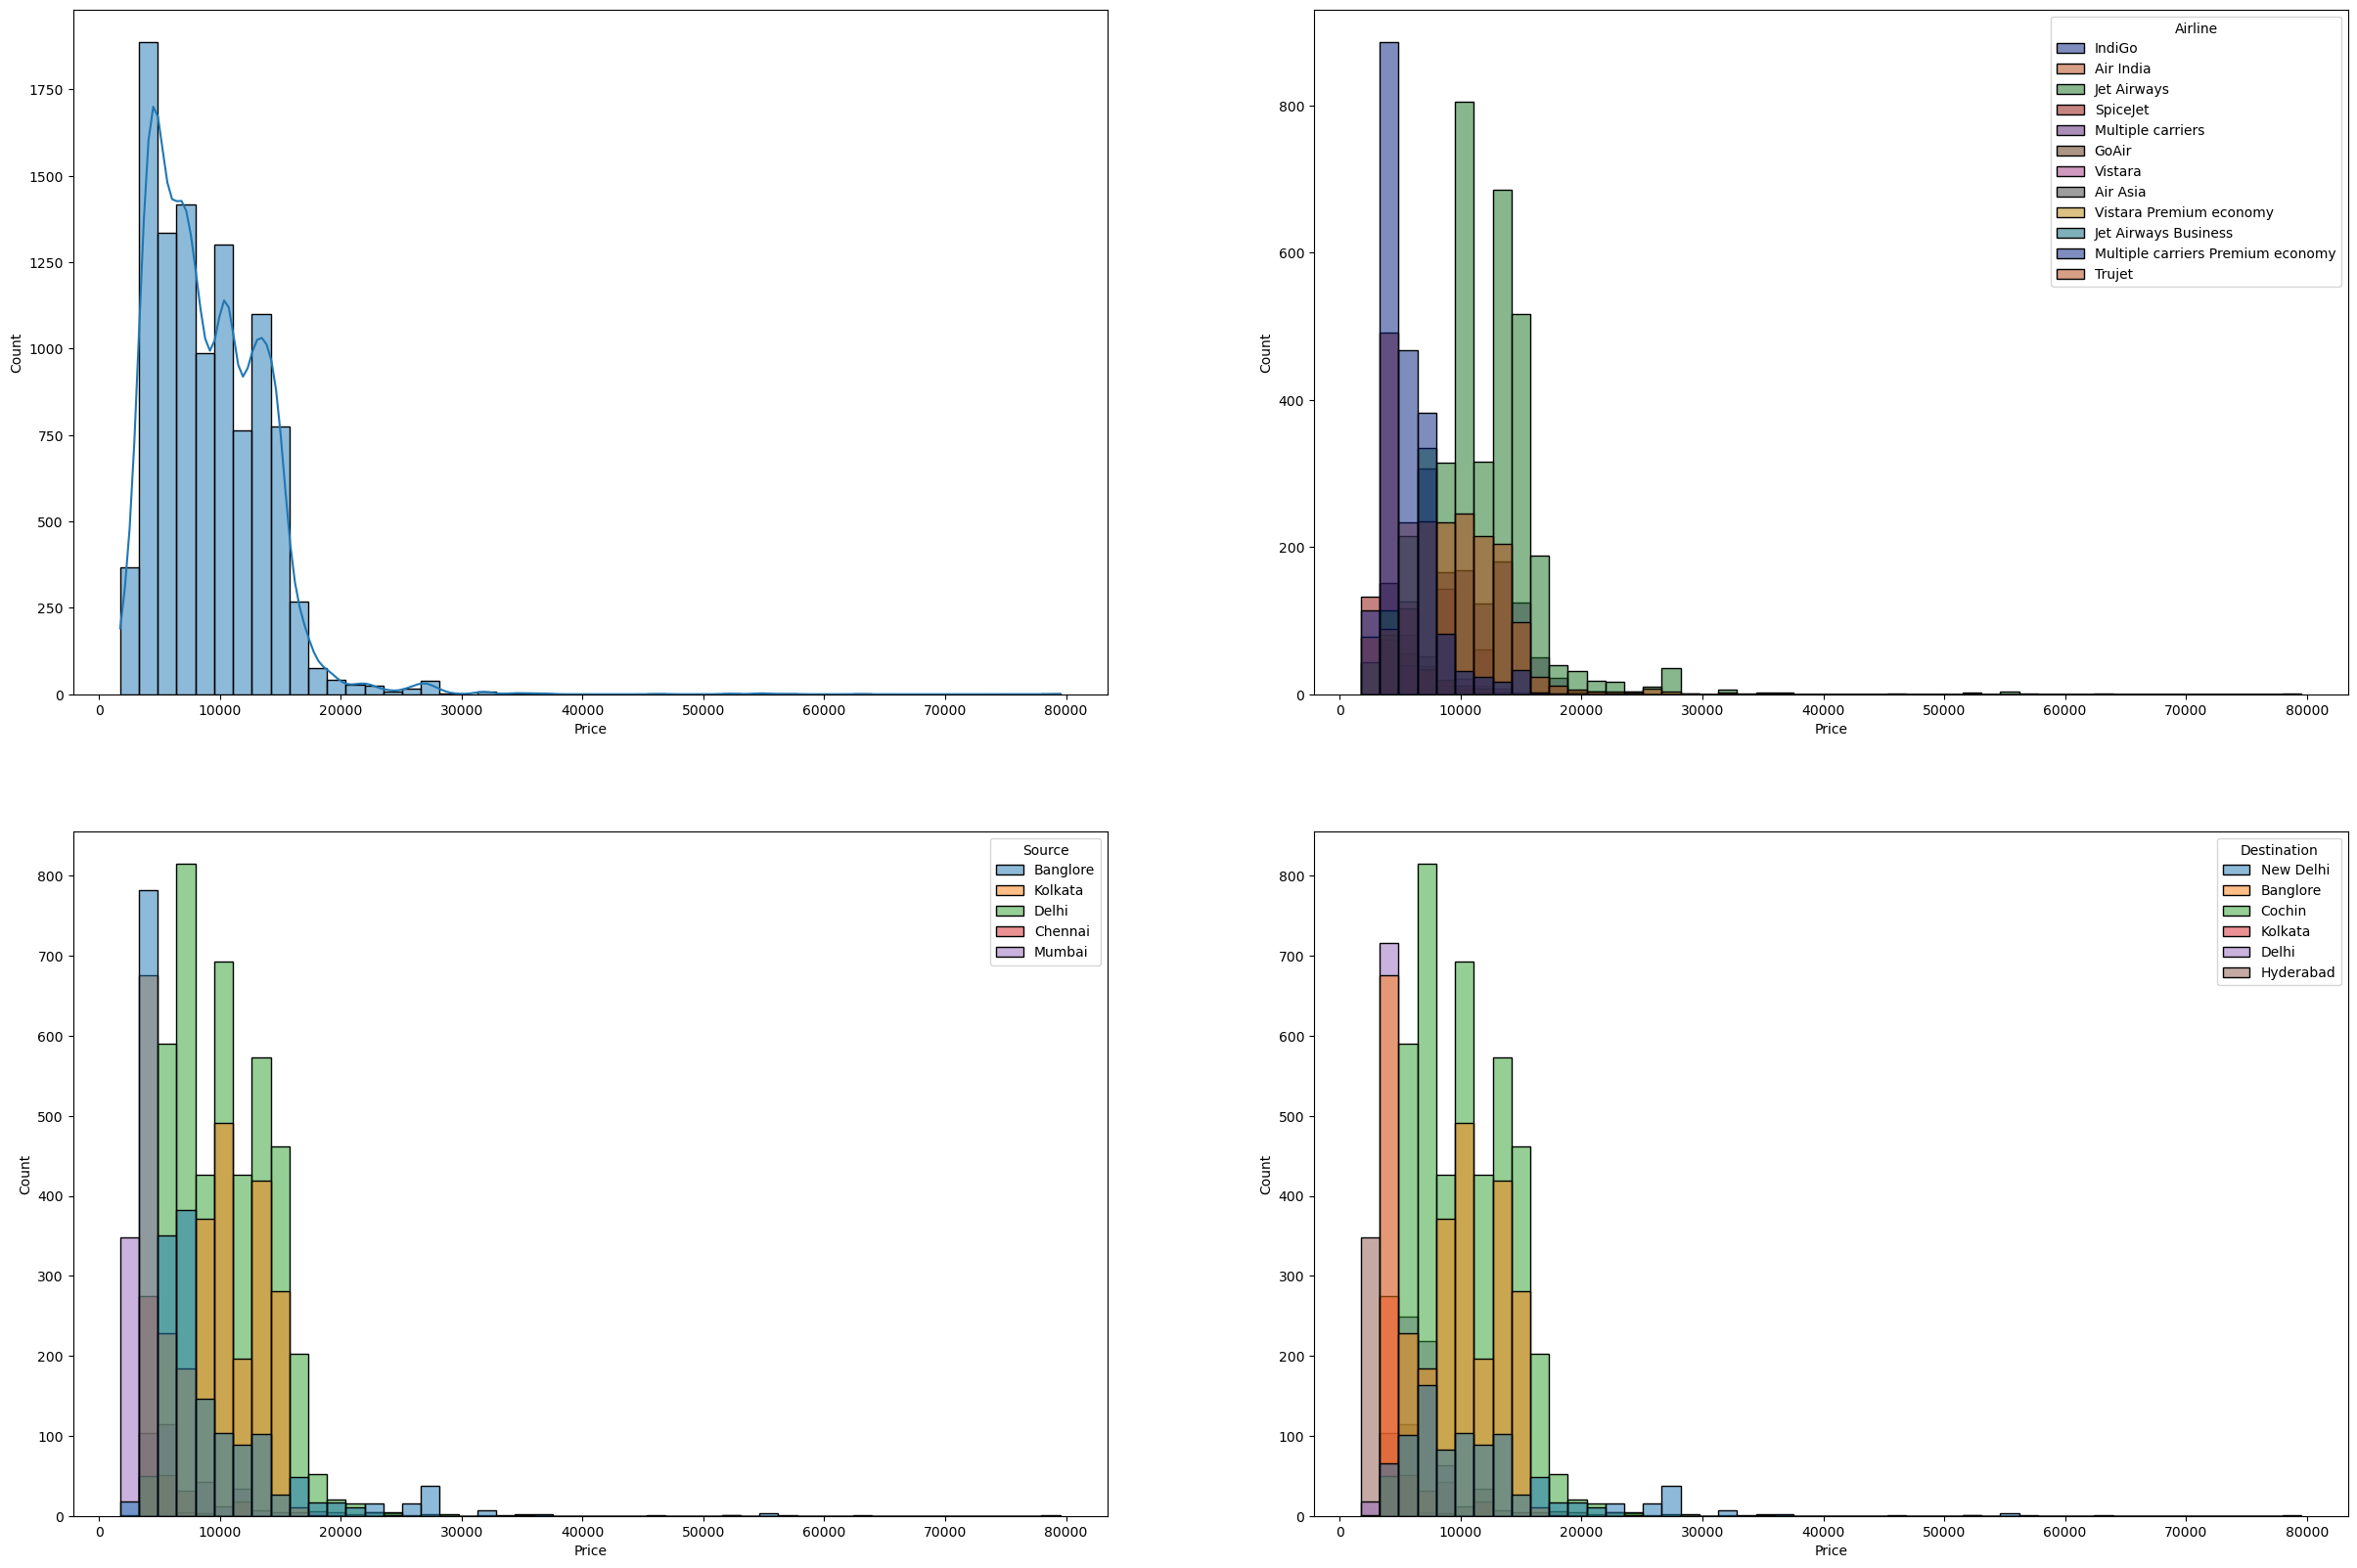

In [53]:
#Comparing flight prices and other categorical features
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
sns.histplot(data=df,x='Price',kde=True,bins=50)
plt.subplot(2,2,2)
sns.histplot(data=df,x='Price',hue='Airline',bins=50,palette='dark')
plt.subplot(2,2,3)
sns.histplot(data=df,x='Price',hue='Source',bins=50)
plt.subplot(2,2,4)
sns.histplot(data=df,x='Price',hue='Destination',bins=50)

- Jet Airways Business and Other premium carriers charge heavily
- Delhi and Banglore airports have act as source  and destination for many economic flights
- 

In [61]:
#Let's convert duration into hours
df['Duration']=df['Duration'].str.replace('h','.').str.replace(' ','').str.replace('m','').astype(float)
df['Duration']

0         2.50
1         7.25
2        19.00
3         5.25
4         4.45
         ...  
10666      NaN
10667      NaN
10668      NaN
10669      NaN
10670      NaN
Name: Duration, Length: 10671, dtype: float64

In [62]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day', 'Month', 'Year', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hour',
       'Duration_minute', 'Encoded_Add_Info', 'Encoded_Arline',
       'Encoded_Source', 'Encoded_Destination'],
      dtype='object')

<AxesSubplot:>

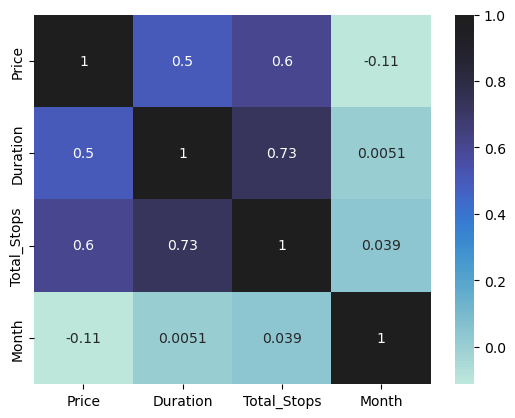

In [67]:
sns.heatmap(df[['Price','Duration','Total_Stops','Month']].corr(),annot=True,center=1)

- Price and Duration, Total_Stops are postively correlated 
- Price and Month are negatively created.
- This may happpen becuase demand is high on June and July thus, airlines might reduce their prices to cater more customers to increase overall revenue


Q8

Features such as 
- Duration
- Total_Stops
- Destination
- Airline 
are the most important features to predict flight prices.

here, Destination and Airline are categorical features , hence I would use simple bar plot with kde and hue for this.

For numerical features, I would use a heat map to map the correlation matrix.


## Google Play Store ##

Q 9

Loading cleaned play store dataset


In [4]:
#Load dataset
data=pd.read_csv('Transformed_PlayStore.csv')
df=data.copy()
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Encoded Content Rating,Last Updated Day,Last Updated Month,Last Updated Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,0,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,1,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,0,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,1,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000,5000000,0,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,0,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,4,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000,100000,0,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,1,20,6,2018


In [5]:
print('The number of rows in this dataset is  {}'.format(len(df)))
print('The number of columns in this dataset is  {}'.format(len(df.columns)))


The number of rows in this dataset is  8432
The number of columns in this dataset is  17


The following questions can be answered precisely when we consider cleaned dataframe.

Q 10

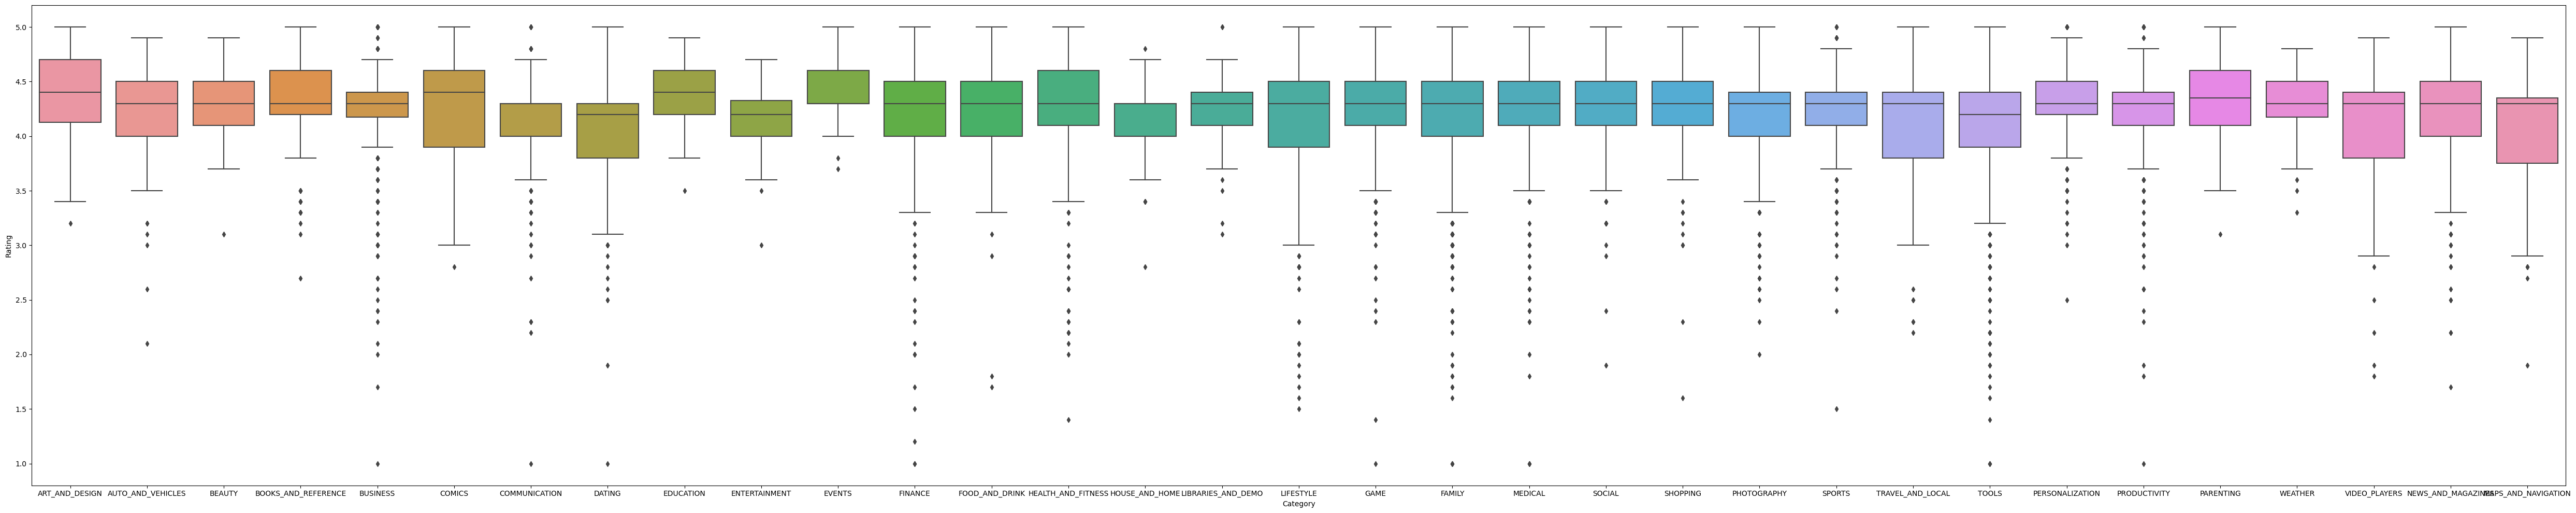

In [12]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df[['Category','Rating']],x='Category',y='Rating')
plt.tight_layout()

### Observations ###
-  Most of ratings for different categories lie between 3.5 and 5. And certainly, there are outliers in each category.

Q 11

There were many missing values in the dataset, majorly in rating column, But as the following dataset
is a cleaned one. There are no missing value. 

Missing values do impact the analysis of the data. They can also make a model biased which is not favourable. Hence, it is a best practice to clean or handle missing values of the data as part of EDA and FEature Engineering

In [13]:
df.isna().sum()

App                       0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
Encoded Content Rating    0
Last Updated Day          0
Last Updated Month        0
Last Updated Year         0
dtype: int64

Q12

Text(0.5, 1.0, 'Rating Vs Size')

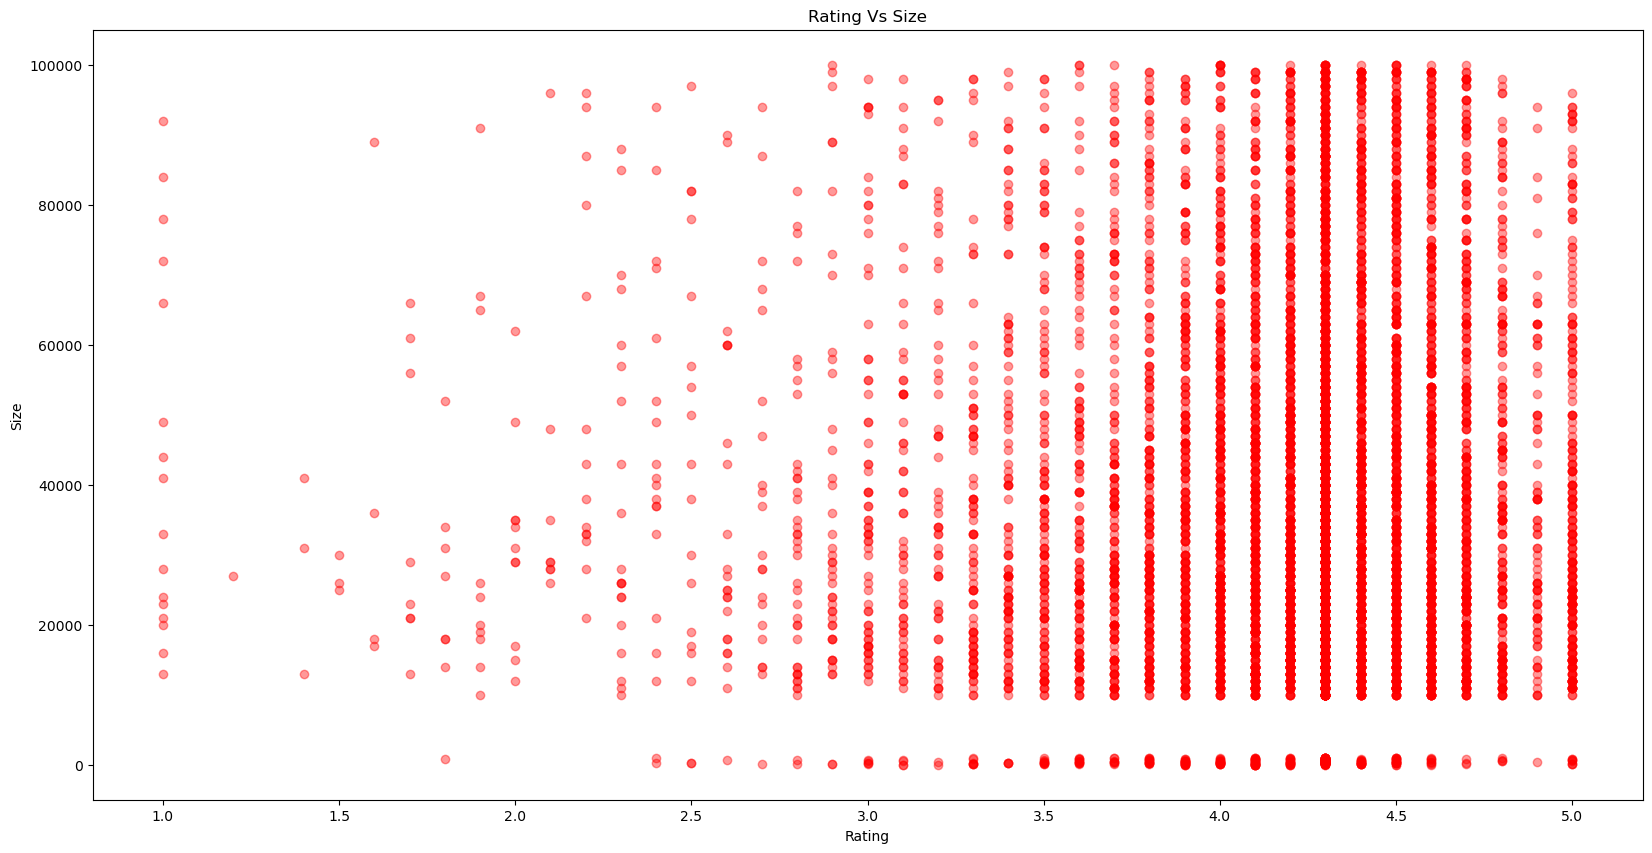

In [21]:
plt.figure(figsize=(20,10))
plt.scatter(df['Rating'],df['Size'],alpha=0.4,c='r')
plt.xlabel('Rating')
plt.ylabel('Size')
plt.title('Rating Vs Size')

### Observations ###
- There are lot less app whose ratings are below 3 
- There are many apps per rating(>3.5) whose size are below 60000 kb
 

Q13

<AxesSubplot:xlabel='Type'>

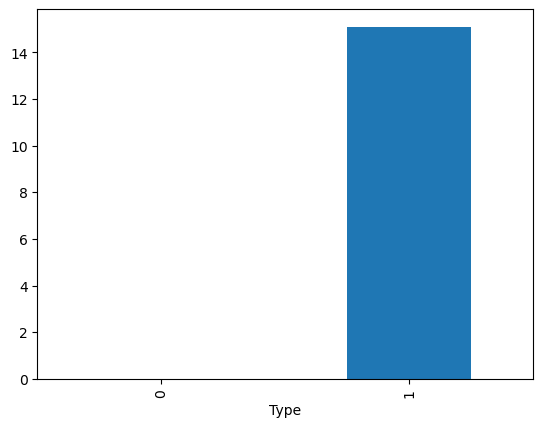

In [24]:
df.groupby(by='Type')['Price'].mean().plot(kind='bar')

### Observations ###
- Here Type 0  refers to 'Free' and Type 1 refers to 'Paid'

Q14

In [27]:
df[['App','Installs']].sort_values(by='Installs',ascending=False)[:10]

,App,Installs
2258,Google News,1000000000
1042,Subway Surfers,1000000000
1959,SHAREit - Transfer & Share,500000000
1048,Temple Run 2,500000000
2105,Dropbox,500000000
260,UC Browser - Fast Download Private & Secure,500000000
246,imo free video calls and chat,500000000
1049,Pou,500000000
3722,Samsung Health,500000000
1043,Candy Crush Saga,500000000


Q15 

The features, I would consider to rule out most popular categories are mean or median installs per category, mean or median ratings per category

In [32]:
df_tinstalls_per_category=df.groupby(by='Category')['Installs'].median()
df_tinstalls_per_category.head()

Category
ART_AND_DESIGN         100000.0
AUTO_AND_VEHICLES      100000.0
BEAUTY                  50000.0
BOOKS_AND_REFERENCE     10000.0
BUSINESS                 1000.0
Name: Installs, dtype: float64

In [34]:
df_tratings_per_category=df.groupby(by='Category')['Rating'].median()
df_tratings_per_category.head()

Category
ART_AND_DESIGN         4.4
AUTO_AND_VEHICLES      4.3
BEAUTY                 4.3
BOOKS_AND_REFERENCE    4.3
BUSINESS               4.3
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Category'>

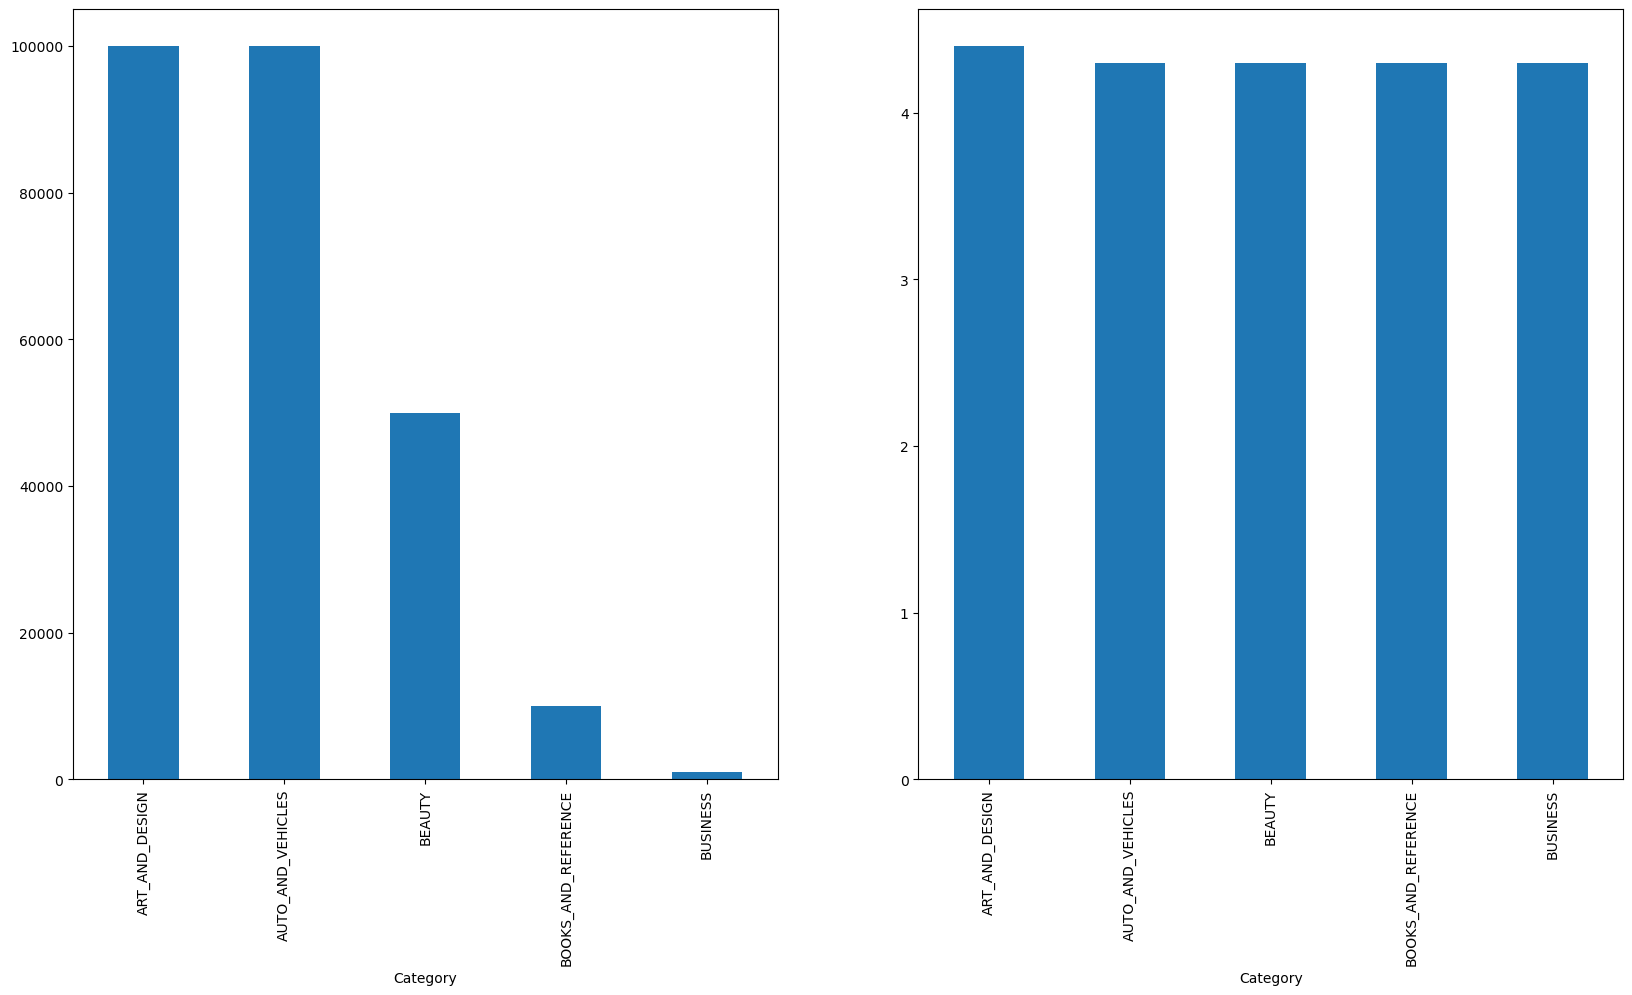

In [43]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
df_tinstalls_per_category.head().plot(kind='bar')
plt.subplot(1,2,2)
df_tratings_per_category.head().plot(kind='bar')



### Observations ###
- Clearly 'ART and DESIGN' and 'Auto_and _Vehicles' are most popular app categories

Q 16

Successfull app developers generally build apps which are user centric and help app to be successfull.Hence, features which measure app's success are necessary. Also, good app developers make app available for latest android version. I would also consider android version feature present in the dataset.

I would create a new feature called developer index. This feature combines the numerical values of all features discussed. and will be visualized using a bar chart against each app.

Q 17

Choosing a best time to lauch an app in the playstore is highly dependent on the category and genre of the app being launched. As there is no single feature which can determine the best time to release an app in play store. Let's assume, the app being launched belongs to art and design category. This is the most popular category to launch an app. 

But, a concrete insight cannot be provided to estimate the best time to launch a new app. Because, of shortage of neccessary and sufficient features in the dataset.